<a href="https://colab.research.google.com/github/Muppidathe/ml_project/blob/master/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
df=pd.read_csv("Ice_cream selling data.csv")
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


<Axes: xlabel='Temperature (°C)', ylabel='Density'>

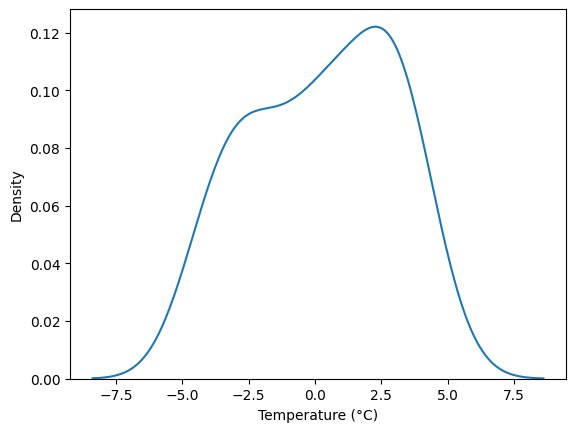

In [6]:
sns.kdeplot(data=df,x='Temperature (°C)')

In [7]:
from scipy.stats import anderson
result=anderson(df['Temperature (°C)'],dist='norm')
print(result.statistic)
print('critical value with 5% significance',result.critical_values[2])
if result.statistic<result.critical_values[2]:
    print('accept null hypothesis(normal distribution)')
else:
    print('reject null hypothesis(non-normal distribution)')

0.7303285861026723
critical value with 5% significance 0.735
accept null hypothesis(normal distribution)


<Axes: xlabel='Ice Cream Sales (units)', ylabel='Density'>

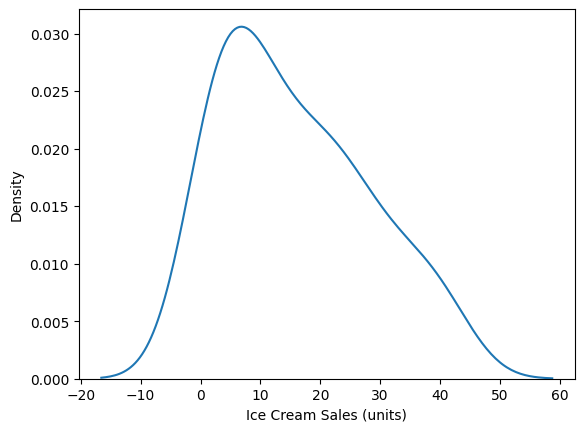

In [8]:
sns.kdeplot(data=df,x='Ice Cream Sales (units)')

In [9]:
from scipy.stats import anderson
result=anderson(df['Ice Cream Sales (units)'],dist='norm')
print(result.statistic)
print('critical value with 5% significance',result.critical_values[2])
if result.statistic<result.critical_values[2]:
    print('accept null hypothesis(normal distribution)')
else:
    print('reject null hypothesis(non-normal distribution)')

1.0015703734244426
critical value with 5% significance 0.735
reject null hypothesis(non-normal distribution)


# by analysing the distribution we came to know that `x` is normally distributed and `y` is non-normally distributed

<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

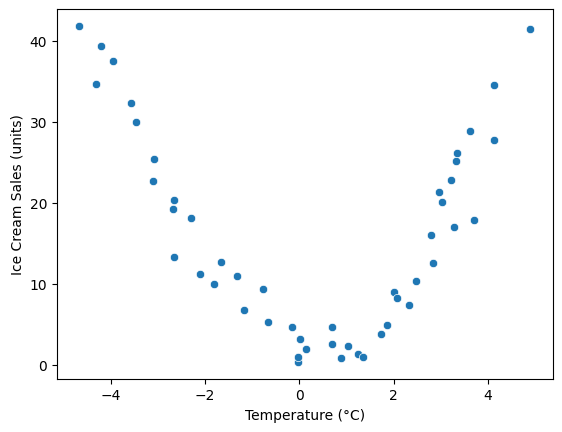

In [10]:
sns.scatterplot(data=df,x='Temperature (°C)',y='Ice Cream Sales (units)')

## above plot show that there is no linear relationship between the data and there is monotonic relationship also

## so we can go with **pearson**

In [11]:
from scipy.stats import pearsonr
corr,p=pearsonr(df['Temperature (°C)'],df['Ice Cream Sales (units)'])
print(corr)
print(p)

-0.17518429270784353
0.22860109702634027


# by seeing the above correlation value we can say that there is no relationship between x and y this is because of (p-value(0.56)>.05) we can't reject the null hypothesis and there is very low correlation(-0.084)

## **anyway we continue to build the model assuming because of u shaped relationship pearson/spearman won't work better**

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(df[['Temperature (°C)']],df['Ice Cream Sales (units)'],test_size=0.2,random_state=42)

In [14]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
x=df[['Temperature (°C)']]
y=df['Ice Cream Sales (units)']
y_pred=model.predict(x)

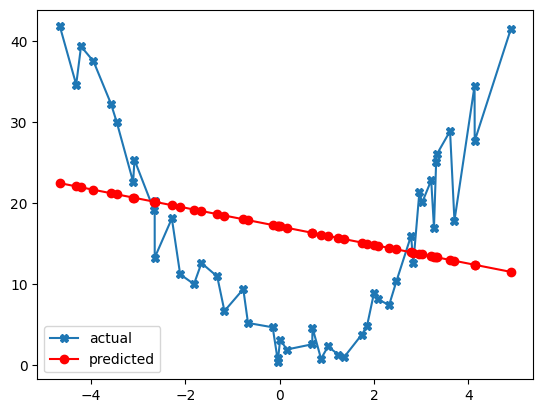

In [16]:
import matplotlib.pyplot as plt
plt.plot(x,y,marker='X',label='actual')
plt.plot(x,y_pred,marker='o',color='red',label='predicted')
plt.legend()
plt.show()

#above plot show that linear regression model can't generalizing the data very well

# so we move on with ***polynomial regression***

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_train_poly

array([[ 1.00000000e+00, -2.11186969e+00,  4.45999359e+00],
       [ 1.00000000e+00, -3.57855372e+00,  1.28060467e+01],
       [ 1.00000000e+00,  2.31859124e+00,  5.37586534e+00],
       [ 1.00000000e+00, -2.67246083e+00,  7.14204687e+00],
       [ 1.00000000e+00, -3.94966109e+00,  1.55998227e+01],
       [ 1.00000000e+00, -3.10844012e+00,  9.66239999e+00],
       [ 1.00000000e+00,  3.21136614e+00,  1.03128725e+01],
       [ 1.00000000e+00,  3.27004407e+00,  1.06931882e+01],
       [ 1.00000000e+00,  4.13086796e+00,  1.70640701e+01],
       [ 1.00000000e+00, -1.32637898e+00,  1.75928121e+00],
       [ 1.00000000e+00, -2.65228679e+00,  7.03462523e+00],
       [ 1.00000000e+00, -1.17312327e+00,  1.37621820e+00],
       [ 1.00000000e+00,  6.88780908e-01,  4.74419139e-01],
       [ 1.00000000e+00,  2.07510060e+00,  4.30604249e+00],
       [ 1.00000000e+00,  1.74000001e+00,  3.02760004e+00],
       [ 1.00000000e+00, -4.66226268e+00,  2.17366933e+01],
       [ 1.00000000e+00,  3.33593241e+00

In [18]:
x_test_poly=poly.transform(x_test)
x_test_poly

array([[ 1.        , -1.81893761,  3.30853403],
       [ 1.        ,  3.70405744, 13.72004151],
       [ 1.        ,  4.13353379, 17.08610158],
       [ 1.        ,  3.61077848, 13.03772121],
       [ 1.        , -0.77333004,  0.59803936],
       [ 1.        ,  1.02418081,  1.04894634],
       [ 1.        ,  0.87490503,  0.76545881],
       [ 1.        ,  0.69359887,  0.4810794 ],
       [ 1.        ,  1.85055193,  3.42454243],
       [ 1.        , -0.14963487,  0.02239059]])

In [19]:
x_poly=poly.transform(x)

In [20]:
polynomial_model=LinearRegression()
polynomial_model.fit(x_train_poly,y_train)
y_pedict=polynomial_model.predict(x_poly)

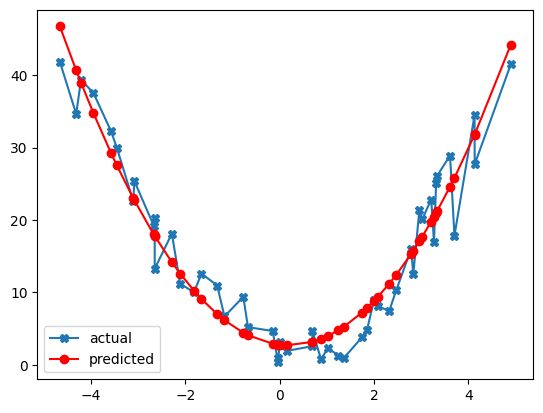

In [21]:
import matplotlib.pyplot as plt
plt.plot(x,y,marker='X',label='actual')
plt.plot(x,y_pedict,marker='o',color='red',label='predicted')
plt.legend()
plt.show()